In [1]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

from HW2.benchmark_proceeder import BenchmarkStorage
from HW2.error_calculator import *
from HW2.regression_generator import generate_regression
from HW2.sgd import sgd, minibatch_gd, gd
from HW2.visualization import visualize_regression_point, visualize_line, draw_levels
from HW2.optimization import *

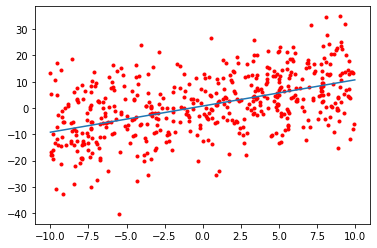

In [2]:
f, points = generate_regression(point_count=500, scale=3, y_scale=10)

visualize_regression_point(f, points)

storage = BenchmarkStorage()

In [4]:
errors = [AbsErrorCalculator(), SquaredErrorCalculator(), BoxErrorCalculator()]
optimizators = [DefaultOptimization(), MomentumOptimization(0.95), NesterovOptimization(0.95), AdaGradOptimization(),
                RMSPropOptimization(0.5), AdamOptimization()]

batch_sizes = [1, 10, 40, len(points)]

result = np.array([])
for error in tqdm(errors, "Errors", position=0):
    for optimizator in tqdm(optimizators, "Optimizations", position=1):
        for batch_size in tqdm(batch_sizes, "Batch sizes", position=2):

            index = storage.add_benchmark_config(batch_size=str(batch_size), optimiser=optimizator, error=error)
            for _ in range(20 if batch_size != len(points) else 1):
                ab, meta = minibatch_gd(points, batch_size=batch_size, error=error,
                                        optimization=optimizator)
                storage.add_benchmark_result(index, meta)
            result = np.append(result, storage.get_benchmark_results_arrayed(index))


result = result.reshape((-1, 8))
df = pd.DataFrame(result, columns=[
    'Config',
    'Mean time',
    'Mean mem',
    'Mean SMAPE',
    'Mean RMSE',
    'Mean logcosh',
    'Mean gradient calls',
    'Mean iterations'
])
df.to_csv("data/2.4.csv", sep='\t')
df

Errors:   0%|          | 0/3 [00:00<?, ?it/s]

Optimizations:   0%|          | 0/6 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Optimizations:   0%|          | 0/6 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Optimizations:   0%|          | 0/6 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Batch sizes:   0%|          | 0/4 [00:00<?, ?it/s]

,Config,Mean time,Mean mem,Mean SMAPE,Mean RMSE,Mean logcosh,Mean gradient calls,Mean iterations
0,"(1, 1, Default(no) optimization, Absolute erro...",0.030101,819.2B,0.613031,10.435914,7.589889,135.85,135.85
1,"(10, 1, Default(no) optimization, Absolute err...",0.015199,0.0B,0.620204,10.414262,7.578746,509.5,50.95
2,"(40, 1, Default(no) optimization, Absolute err...",0.037953,0.0B,0.616097,10.382698,7.555353,2000.0,50.0
3,"(500, 1, Default(no) optimization, Absolute er...",0.400954,0.0B,0.613766,10.373231,7.548012,25000.0,50.0
4,"(1, 1, Momentum optimization (beta=0.95), Abso...",0.00615,0.0B,0.603602,10.5295,7.649577,56.05,56.05
...,...,...,...,...,...,...,...,...
67,"(500, 1, RMS prop optimization (gamma=0.5, eps...",0.355961,0.0B,0.600023,10.338193,7.518798,26500.0,53.0
68,"(1, 1, Adam optimization (beta_1=0.9, beta_2=0...",0.037501,0.0B,0.616873,10.636704,7.743357,356.45,356.45
69,"(10, 1, Adam optimization (beta_1=0.9, beta_2=...",0.031295,0.0B,0.597537,10.370989,7.537859,1336.0,133.6
70,"(40, 1, Adam optimization (beta_1=0.9, beta_2=...",0.075541,0.0B,0.59732,10.351073,7.527119,4968.0,124.2
